In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

In [ ]:
#Load data, the returnX_y argument is set to True to return data and labels
(x, y) = load_iris(return_X_y=True)

In [ ]:
#Wybrany kwiat Versicolor
y_splt = y!=1
y[y_splt] = 0

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,
                                                    test_size=0.2)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.losses import BinaryCrossentropy

In [ ]:
optimizers = ['sgd', 'adam', 'adagrad', 'rmsprop']

1/1 [==============================] - 0s 153ms/step - loss: 0.1178 - accuracy: 0.9667


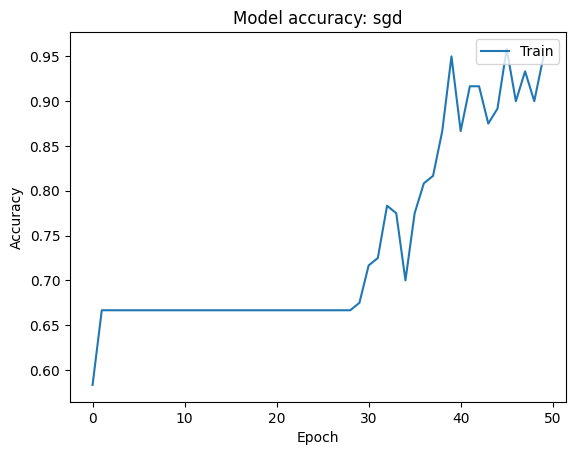

1/1 [==============================] - 0s 114ms/step - loss: 0.0378 - accuracy: 0.9667


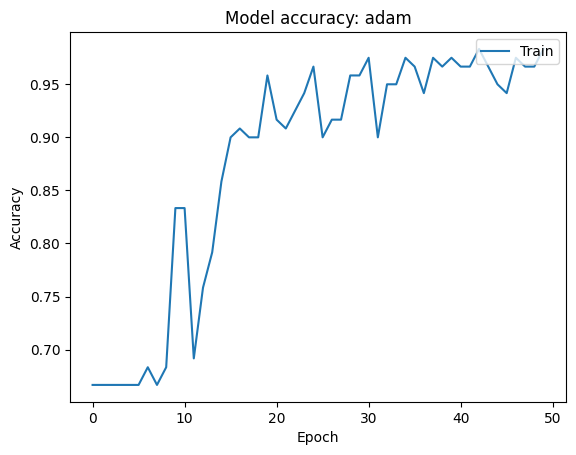

1/1 [==============================] - 0s 113ms/step - loss: 0.1883 - accuracy: 0.6667


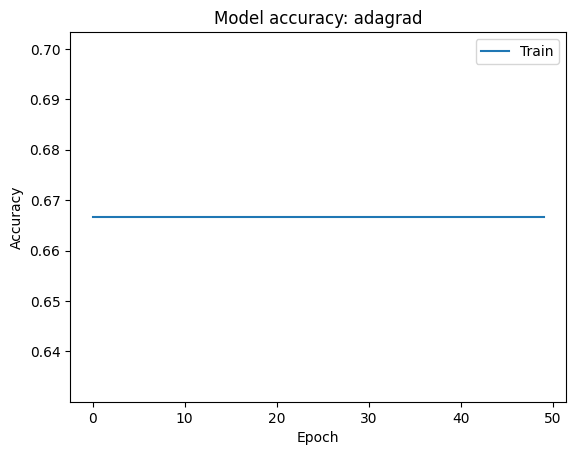

1/1 [==============================] - 0s 114ms/step - loss: 0.0308 - accuracy: 0.9667


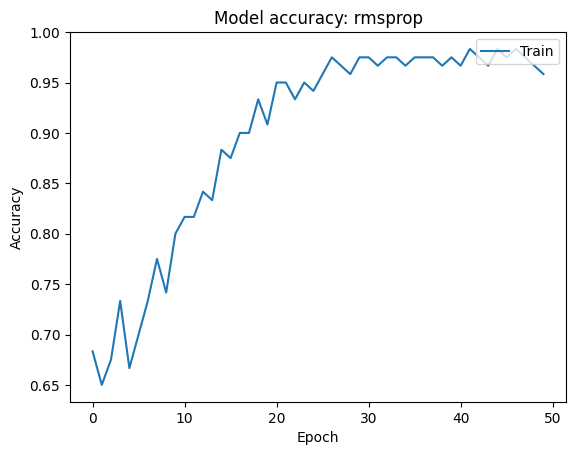

In [ ]:
#Tests the optimizers to chose the one
for opt in optimizers:

  model = Sequential([
    Dense(16, input_dim=4, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=opt, loss='mse',
              metrics='accuracy')
  history = model.fit(x_train, y_train, epochs=50, batch_size=4, verbose=0)

  model.evaluate(x_test, y_test)

  plt.plot(history.history['accuracy'])
  plt.title(f'Model accuracy: {opt}')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train'], loc='upper right')
  plt.show()

In [ ]:
'''model = Sequential([
    Dense(32, input_dim=4, activation='relu'),
    Dense(1, activation='sigmoid')
])
'''
model = Sequential([
    Dense(32, input_dim=4, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-2), loss=BinaryCrossentropy(),
             metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=4, verbose=1)

Epoch 1/10
30/30 [==============================] - 1s 2ms/step - loss: 0.5585 - accuracy: 0.6500
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.6833
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.7250
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.9000
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.9250
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8833
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9500
Epoch 8/10
30/30 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9667
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9333
Epoch 10/10
30/30 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9500


In [ ]:
import numpy as np

In [ ]:
y_result_train = model.predict(x_train)
y_result_train = np.round(y_result_train)
bledy = 0
for i in range(len(y_train)):
 if y_result_train[i] != y_train[i]:
  bledy += 1
print("Liczba bledow ciagu treningowego: ", bledy)

4/4 [==============================] - 0s 3ms/step
Liczba bledow ciagu treningowego:  15


In [ ]:
#Check the model using testing sets
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 126ms/step - loss: 0.1815 - accuracy: 0.9333


[0.18149876594543457, 0.9333333373069763]

In [ ]:
len(y_test)

30

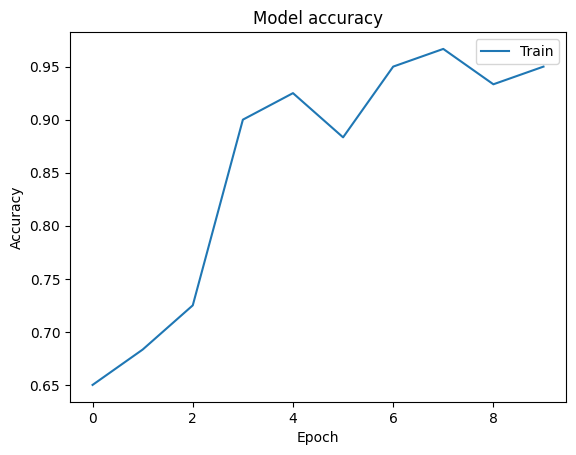

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

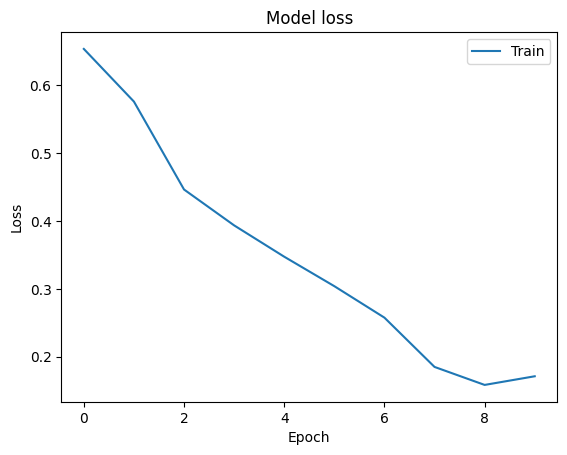

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
# Przewidywanie wyników
y_pred = model.predict(x_train)
# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]
# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded)
recall = recall_score(y_train, y_pred_rounded)
# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_train, y_pred_rounded)

4/4 [==============================] - 0s 3ms/step


In [ ]:
# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.875
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[80  0]
 [15 25]]
